In [19]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
import vgg16; reload(vgg16)
from vgg16 import Vgg16
import collections
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
import numpy.ma as ma
import pylab as pl
import matplotlib.cm as cm
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable
def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)
    
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    print(mosaic.shape)
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        #print (i)
        #print ("row",row * paddedh, row * paddedh + imshape[0])
        #print ("col",col * paddedw, col * paddedw + imshape[1])
        #if i==36:
        #   print (imgs[i])
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

In [2]:
vgg = Vgg16()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [3]:
vgg.model.load_weights('kaggle_dogs_cats_redux.h5')

In [4]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [6]:
path = "../data/kaggle/output/sample/"

In [7]:
batches = vgg.get_batches(path+'train', batch_size=2)

Found 2388 images belonging to 2 classes.


In [8]:
imgs,labels = next(batches)

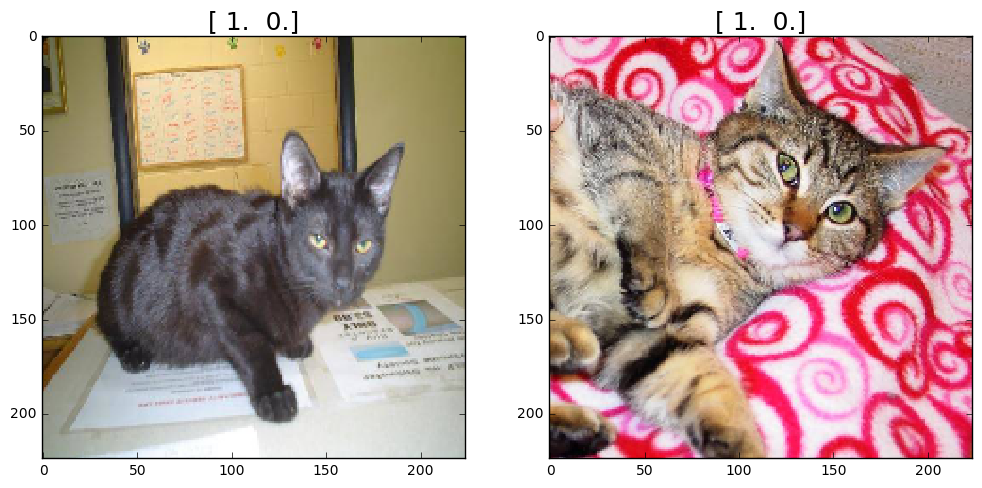

In [9]:
plots(imgs, titles=labels)

In [17]:
# Visualize weights
W = vgg.model.layers[2].W.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)
singleChannelW = W[:,0]
singleChannelW = np.squeeze(singleChannelW)
print("singleChannelW shape : ", singleChannelW.shape)

W shape :  (64, 3, 3, 3)
singleChannelW shape :  (64, 3, 3)


(35, 35)


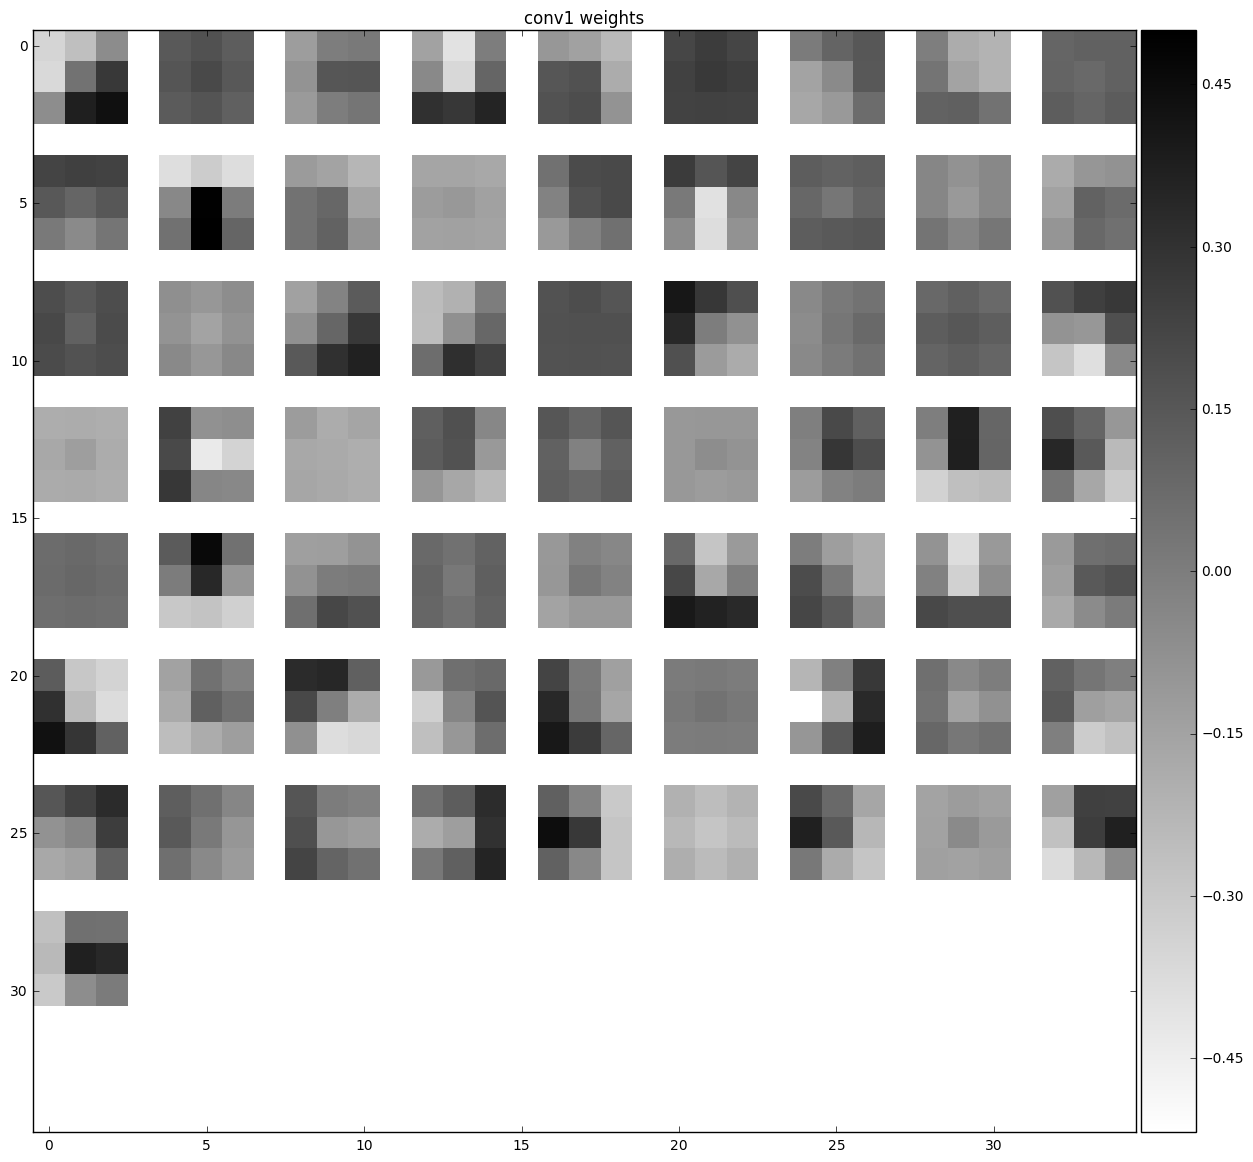

In [20]:
pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(singleChannelW, 9, 9), cmap=cm.binary)

In [ ]:
Visualizing the 64 kernels in the 3rd layer of the VGG model


Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]      

## Visualizing how an image is convoluted after the 3rd layer 

#### Input Image

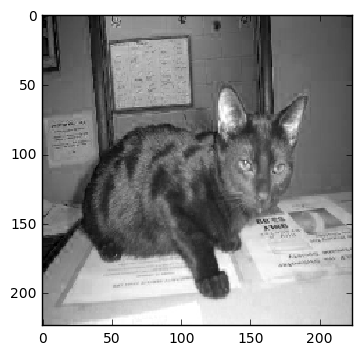

In [21]:
#selecting one image from the above2
img = imgs[0]
#selecting only one channel
plt.gray()
plt.imshow(img[2], interpolation='nearest')

#### Output Image